<a href="https://colab.research.google.com/github/jccc2002/Machine-Learning/blob/main/KNN_implementation_JCCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *KNN logic*

K-Nearest Neighbor algorithm is based on the principle that looks for similarities in the sample given to classify them into categories. To do that, the function needs a sample or dataset with features. Then will be looked for the K nearest samples, or neighbors, to the input to determine how many neighbors belong to each class and make a prediction based on the results.


## *Algorithm pseudocode*

1. Load the training dataset.
2. Load the test dataset.
3. Definition of the function to calculate the Euclidean distance between two points.
4. Definition of the function to find the K nearest neighbors given a new point.
    - Initialize an empty list of distances.
    - For each sample in X_train:
       - Calculate the distance between an unknown point and point using euclidean distance.
       - Add the distance and the corresponding label to the distances list.
       
   - Sort the distances list by distance from smallest to largest.
   - Select the first K elements from the list as neighbors.
5. Definition a function to make class predictions for a new point using KNN.
   - Find the K nearest neighbors.
   - Count the class frequencies of the neighbors and store them.
   - Choose the class with the highest frequency as the prediction and return it.
6. For each sample in X_test:
   - Make a prediction using knn_predict with K neighbors and X_train, y_train.
   - Store the prediction in a list of predictions.
7. Evaluate the model's performance by comparing the predictions to the true labels of X_test using evaluation metrics



## *Code*

In [ ]:
!pip install pandas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

train_size = 0.8

num_train_samples = int(len(X) * train_size)
num_test_samples = len(X) - num_train_samples

X_train = X[:num_train_samples]
y_train = y[:num_train_samples]
X_test = X[-num_test_samples:]
y_test = y[-num_test_samples:]

# Test point
new_point = X_test[0]

k = 7

In [ ]:
#Mathematical formula to find the distance among the neighbors
def eucDistance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
# Function to find the nearest neighbors
def nearNeighbor(X_train, y_train, new_point, k):
    distances = []

    for i in range(len(X_train)):
        dist = eucDistance(new_point, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return neighbors

In [ ]:
# Predict the class using KNN
def knn_predict(X_train, y_train, new_point, k):
    distances = []


    for i in range(len(X_train)):
        dist = eucDistance(new_point, X_train[i])
        distances.append((dist, y_train[i]))

    # Order distances
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    # frecuency of classes
    class_counts = {}
    for neighbor in neighbors:
        _, label = neighbor
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    # class with highest frecuency as prediction
    prediction = max(class_counts, key=class_counts.get)
    return prediction

# Perform the prediction
prediction = knn_predict(X_train, y_train, new_point, k)

In [ ]:

print("Prediction:", prediction)

Prediction: 1


In [ ]:
correct_predictions = 0

for i in range(len(y_test)):
    if y_test[i] == prediction:
        correct_predictions += 1

accuracy = correct_predictions / len(y_test)

print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7719298245614035


In [ ]:
print("Clasification Results:")
for cls in np.unique(y_test):
    correct_count = np.sum((y_test == cls) & (prediction == cls))
    incorrect_count = np.sum((y_test == cls) & (prediction != cls))
    print(f"Class {cls}: {correct_count} Correctly classified, {incorrect_count} incorrectly classified")

Clasification Results:
Class 0: 0 Correctly classified, 26 incorrectly classified
Class 1: 88 Correctly classified, 0 incorrectly classified


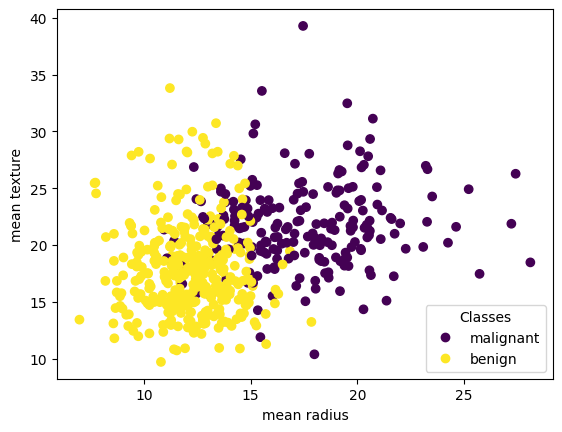

In [ ]:
# Visualize the points in a graph
_, ax = plt.subplots()
scatter = ax.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax.set(xlabel=data.feature_names[0], ylabel=data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes"
)

# Graph
plt.show()

## *Loss function and optimization*

KNN does not involve a loss or optimization function during its training process because it's not a model-based method.

The calculation of distances between the query point and all training points and selects the K-nearest neighbors based on a distance metric.

In [ ]:
#Export to HTML
%%shell
jupyter nbconvert --to html /content/KNN_implementation_JCCC.ipynb

[NbConvertApp] Converting notebook /content/KNN_implementation_JCCC.ipynb to html
[NbConvertApp] Writing 700536 bytes to /content/KNN_implementation_JCCC.html
